In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [161]:
df=pd.read_csv("Student_Performance.csv")

In [163]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [165]:
df.shape

(10000, 6)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [169]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [171]:
df.rename(columns={"Sample Question Papers Practiced":"Sample Question"},inplace=True)

<Axes: xlabel='Hours Studied'>

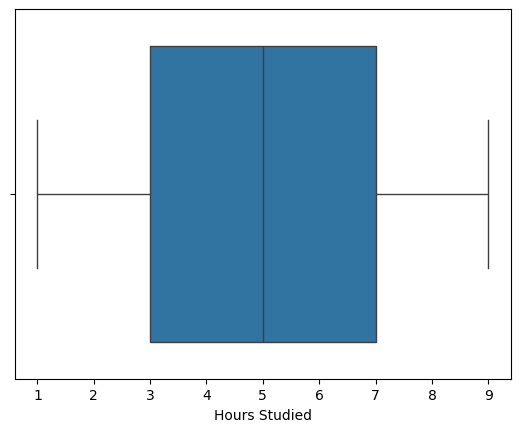

In [173]:
sns.boxplot(x="Hours Studied",data=df)

<Axes: xlabel='Previous Scores'>

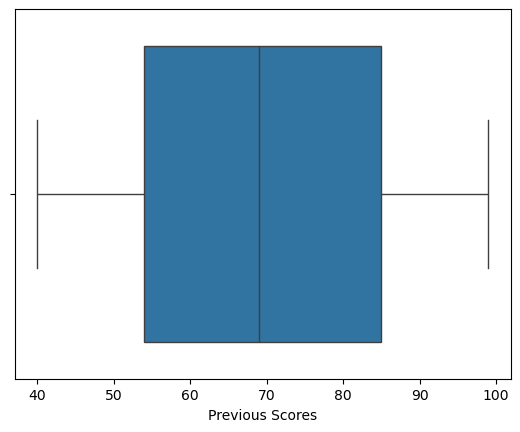

In [174]:
sns.boxplot(x="Previous Scores",data=df)

<Axes: xlabel='Sleep Hours'>

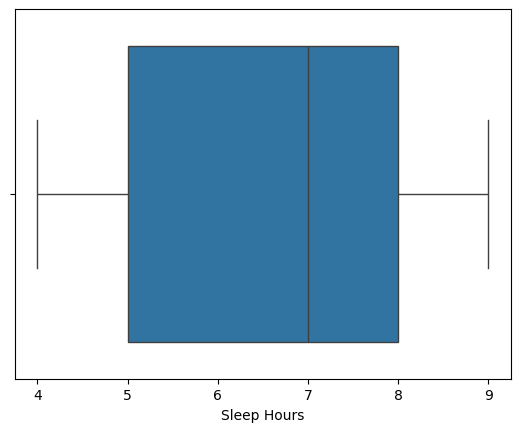

In [176]:
sns.boxplot(x="Sleep Hours",data=df)

<Axes: xlabel='Sample Question'>

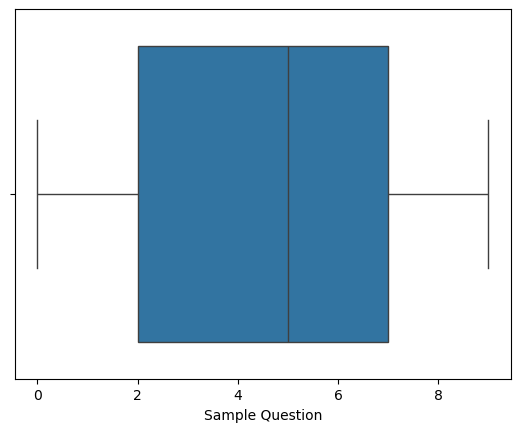

In [178]:
sns.boxplot(x="Sample Question",data=df)

<Axes: xlabel='Performance Index'>

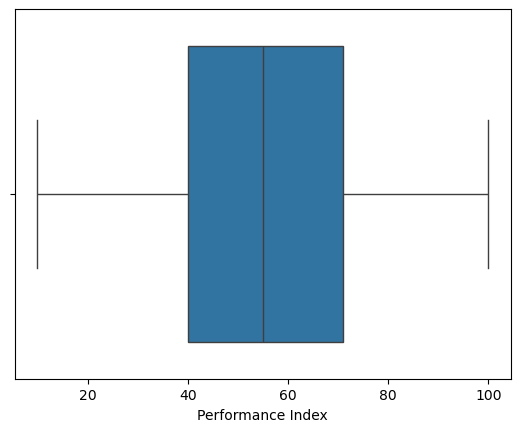

In [181]:
sns.boxplot(x="Performance Index",data=df)

In [183]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

In [185]:
from sklearn.preprocessing import LabelEncoder

In [187]:
enc=LabelEncoder()

In [189]:
df["Extracurricular Activities"]=enc.fit_transform(df["Extracurricular Activities"])

In [191]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [193]:
x=df.iloc[:,:-1]
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [195]:
y=df.iloc[:,-1]
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [199]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
model=RandomForestRegressor()

In [203]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [205]:
y_pred=model.predict(x_test)

In [207]:
y_test.head()

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
Name: Performance Index, dtype: float64

In [211]:
from sklearn.metrics import r2_score

In [213]:
print("testing accuracy is:",r2_score(y_pred,y_test)*100)

testing accuracy is: 98.58158827166008


In [221]:
x_pred=model.predict(x_train)

In [223]:
y_train.head()

9254    36.0
1561    25.0
1670    59.0
6087    22.0
6669    40.0
Name: Performance Index, dtype: float64

In [225]:
print("testing accuracy is:",r2_score(x_pred,y_train)*100)

testing accuracy is: 99.74343429828517
